# Dipole Example

Simple quadrupole example


In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
# locate the drift template
from impact import Impact

ifile = '../templates/dipole/ImpactT.in'
os.path.exists(ifile)

True

In [6]:
I = Impact(ifile, verbose=True)
#I.header['Bcurr'] = 0.001
I.total_charge=1e-12
I.run()

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpox0gzsv_
Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpox0gzsv_
/Users/chrisonian/Code/miniconda3/envs/devel/bin/ImpactTexe
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
           0  0.24496010579045746     
 pass generating initial distribution...
 i,t,<z>:            1   0.0000000000000000        0.0000000000000000     
 zmin,zmax:    1.8389888591620600E-004   2.6279620355294294E-003
 i,t,<z>:            2   9.9999999999999994E-012   1.4962137231638621E-003
 zmin,zmax:    3.1818230745072162E-003   5.6258862241205521E-003
 i,t,<z>:            3   1.9999999999999999E-0

In [7]:
!cat {I.path}/ImpactT.in

! Impact-T input file
!Npcol Nprow
1 1
!Dt Ntstep Nbunch
1e-11 10000000 1
!Dim Np Flagmap Flagerr Flagdiag Flagimg Zimage
6 10000 1 0 2 0 0.02
!Nx Ny Nz Flagbc Xrad Yrad Perdlen
32 32 32 1 0.015 0.015 45.0
!Flagdist Rstartflg Flagsbstp Nemission Temission
2 0 0 0 0.0
!sigx(m) sigpx muxpx xscale pxscale xmu1(m) xmu2
1e-05 0.0005 0.0 1.0 1.0 0.0 0.0
!sigy(m) sigpy muxpy yscale pyscale ymu1(m) ymu2
1e-05 0.0 0.0 1.0 1.0 0.0 0.0
!sigz(m) sigpz muxpz zscale pzscale zmu1(m) zmu2
0.0003 0.0 0.0 1.0 1.0 0.0 1956.9511835591836
!Bcurr Bkenergy Bmass Bcharge Bfreq Tini
0.001 1.0 510998.95 -1.0 1000000000.0 0.0
!=================== LATTICE ===================
0 0 0 -8 0.0 -1 -1000.0 /!name:SC_off
!0.2 0 0 1 0.5 2.98 0.108 0.016 0.0 0.0 0.0 0.0 0.0 /!name:QE04
2.2 0 0 4 0.5 0.0 -0.33356405164803316 777 0.01 /!name:B1
!0 1 42 -2 0.0 0.0 3.0 /!name:beam1
!0 1 43 -2 0.0 0.0 3.1 /!name:beam2
!0 0 0 -99 0 0.0 3.7 /!name:stop_1


In [8]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 1e9 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


1956.9509280596917

In [10]:
from impact.elements.dipole import new_dipole_fieldmap_data, dipole_fieldmap_lines
#THETA = 30*np.pi/180
MYL = 2.1
#MYG = THETA/MYL
GAMMA=1e9/mec2
MYG = 1/10
#GAMMA = 1e9/mec2
THETA = MYG*MYL


GB = np.sqrt(GAMMA**2 -1)

DMAP = new_dipole_fieldmap_data(L=MYL, g=MYG, gamma_ref=GAMMA, e1=0, e2=0,  half_gap=0.01, fint=0.5, csr_on=True)

# make fieldmap
print(dipole_fieldmap_lines(DMAP, '../templates/dipole/rfdata777'))

1
1956.9511835591834
0.0
0.0
0.0
0.03
0.2131424443826454
2.131087505316458
0.2131424443826454
2.1617613823364508
0.03
0.03
0
2.0
0
0
0
0
0
0
0.015
2.145


In [11]:
DMAP

{'csr_on': 1,
 'gamma_ref': 1956.9511835591834,
 'entrance_s': 0.015,
 'exit_s': 2.145,
 'k1': 0.0,
 'k2': 0.0,
 'b1': 0.0,
 'b2': 0.03,
 'k3': 0.2131424443826454,
 'k4': 0.2131424443826454,
 'b3': 2.131087505316458,
 'b4': 2.1617613823364508,
 'c1': 0,
 'c2': 2.0,
 'c3': 0,
 'c4': 0,
 'c5': 0,
 'c6': 0,
 'c7': 0,
 'c8': 0,
 'w1': 0.03,
 'w2': 0.03}

# Use Impact's built-in Gaussian particle generator

In [13]:
I = Impact(ifile)

c_light=299792458.

I.header['Np'] = 1000000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 256
I.header['Dt'] = 0.01/c_light
#I.header['Ntstep'] = 200
#I.input['fieldmaps']['rfdata777']['data'][0] = 1 # Turn on/off CSR
#I.input['fieldmaps']['rfdata777']['data'][-1] = 1 # exit_s
I.ele['B1']['L'] = MYL

#I.header['zmu2'] = GB
#I.stop = 3.1
I.total_charge = 1e-12
I.verbose=True
I.write_input()
print(I)

================ Impact-T Summary ================    
1000000 particles
1 bunch of electrons
total charge: 1.0 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 256
Maximum time steps: 10000000
Reference Frequency: 1000000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpmgm4d3_1


In [14]:
!cat {I.path}/ImpactT.in

! Impact-T input file
!Npcol Nprow
1 1
!Dt Ntstep Nbunch
3.335640951981521e-11 10000000 1
!Dim Np Flagmap Flagerr Flagdiag Flagimg Zimage
6 1000000 1 0 2 0 0.02
!Nx Ny Nz Flagbc Xrad Yrad Perdlen
32 32 256 1 0.015 0.015 45.0
!Flagdist Rstartflg Flagsbstp Nemission Temission
2 0 0 0 0.0
!sigx(m) sigpx muxpx xscale pxscale xmu1(m) xmu2
1e-05 0.0005 0.0 1.0 1.0 0.0 0.0
!sigy(m) sigpy muxpy yscale pyscale ymu1(m) ymu2
1e-05 0.0 0.0 1.0 1.0 0.0 0.0
!sigz(m) sigpz muxpz zscale pzscale zmu1(m) zmu2
0.0003 0.0 0.0 1.0 1.0 0.0 1956.9511835591836
!Bcurr Bkenergy Bmass Bcharge Bfreq Tini
0.001 1.0 510998.95 -1.0 1000000000.0 0.0
!=================== LATTICE ===================
0 0 0 -8 0.0 -1 -1000.0 /!name:SC_off
!0.2 0 0 1 0.5 2.98 0.108 0.016 0.0 0.0 0.0 0.0 0.0 /!name:QE04
2.1 0 0 4 0.5 0.0 -0.33356405164803316 777 0.01 /!name:B1
!0 1 42 -2 0.0 0.0 3.0 /!name:beam1
!0 1 43 -2 0.0 0.0 3.1 /!name:beam2
!0 0 0 -99 0 0.0 3.7 /!name:stop_1


In [15]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpmgm4d3_1
/Users/chrisonian/Code/miniconda3/envs/devel/bin/ImpactTexe
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
           0  0.24496010579045746     
 pass generating initial distribution...
 i,t,<z>:            1   0.0000000000000000        0.0000000000000000     
 zmin,zmax:    3.5219718148412848E-003   6.7445921877632292E-003
 i,t,<z>:            2   3.3356409519815209E-011   4.9999619403050463E-003
 zmin,zmax:    1.3521970509241475E-002   1.6744590882163828E-002
 i,t,<z>:            3   6.6712819039630417E-011   1.4999960634705186E-002
 time:    0.0000000000000000, elapsed: 134.26810503005

In [16]:
I.archive()

Archiving to file impact_cca8f2409557b4d2474e4d0945496876.h5


'impact_cca8f2409557b4d2474e4d0945496876.h5'

In [17]:
PF = I.particles['final_particles']
PF['mean_z']

2.5999999972294443

In [18]:
P26 = PF.copy()

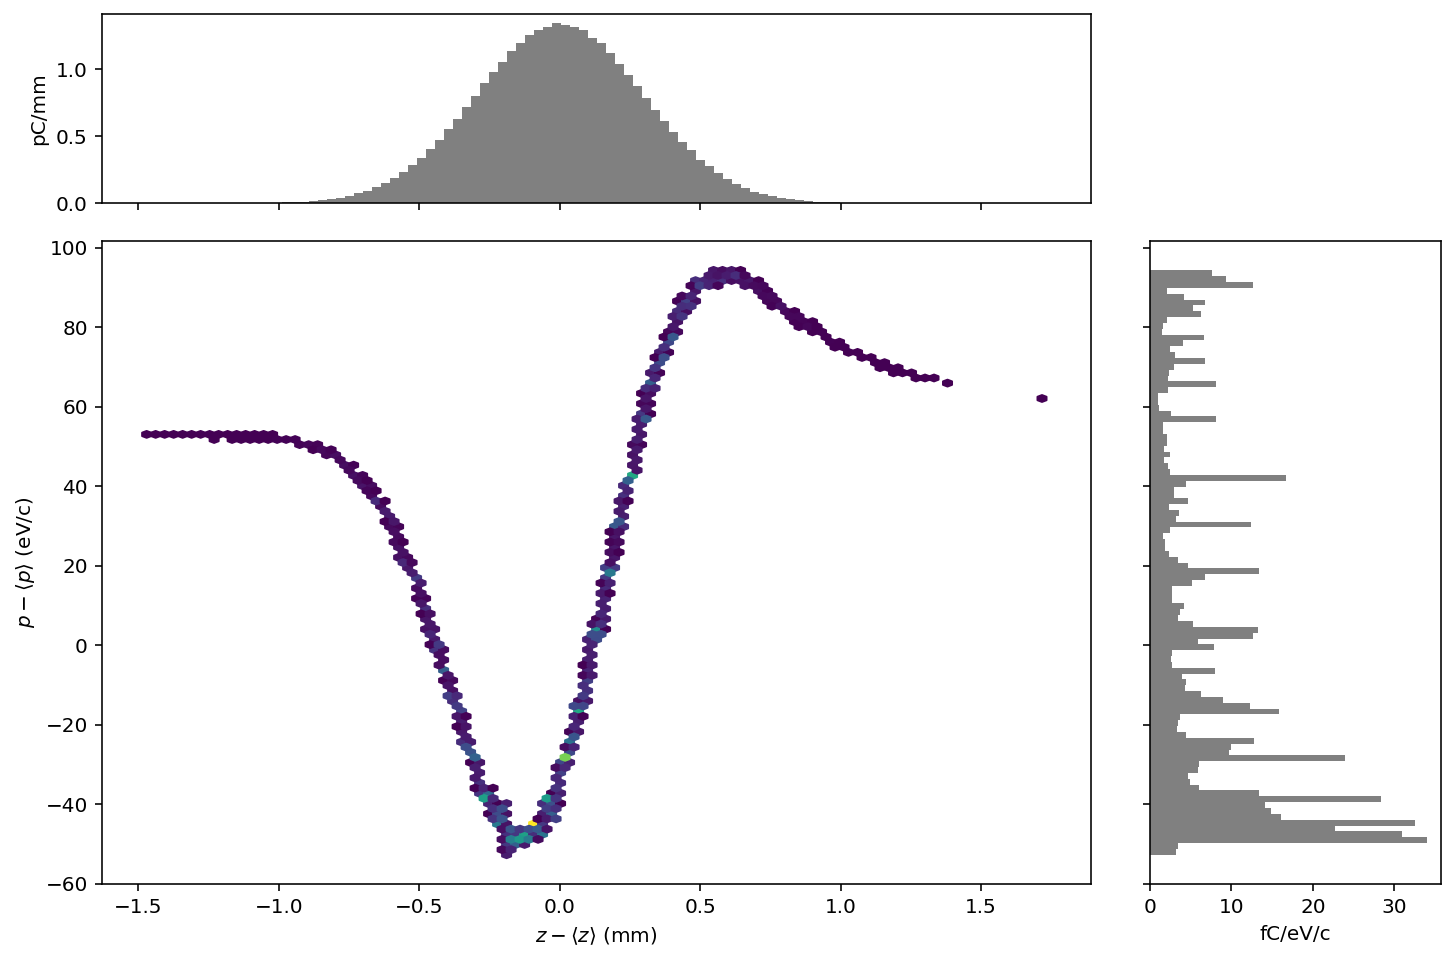

In [19]:
PF.plot('delta_z', 'delta_p', bins=100, figsize=(12,8))

In [20]:
P2 = PF.copy()

In [21]:
P1['mean_z'], P2['mean_z']

NameError: name 'P1' is not defined

In [22]:
k1 = 'min_p'
P1[k1], P4[k1], P3[k1]

NameError: name 'P1' is not defined

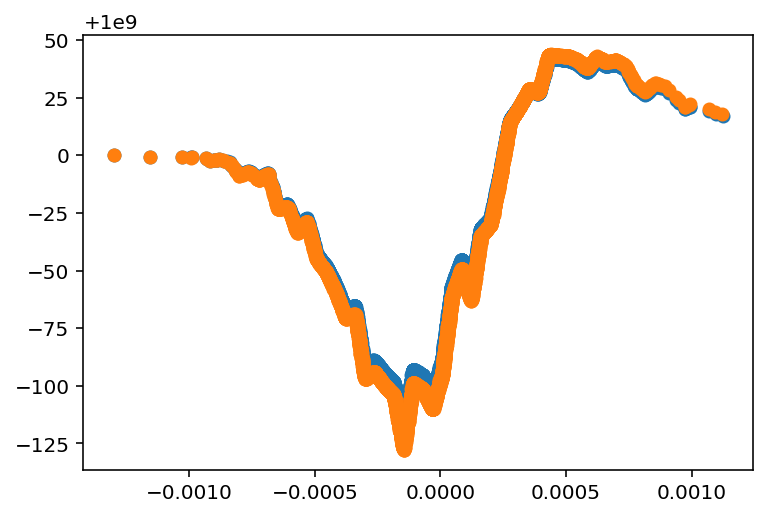

In [33]:
k1='delta_z'
k2='p'
plt.scatter(P1[k1], P1[k2])
plt.scatter(P2[k1], P2[k2])

In [ ]:
I.particles['initial_particles'].plot('y', 'py')

# Single particle tracking

In [14]:
from impact.elements import dipole

In [15]:
dipole.parse_dipole_fieldmap_data

<function impact.elements.dipole.parse_dipole_fieldmap_data(data)>

In [16]:
I.ele['B1']

{'description': 'name:B1',
 'original': '2.2 0 0 4 0.5 0.0 -0.33356405164803316 777 0.01 /!name:B1',
 'L': 2.1,
 'type': 'dipole',
 'zedge': 0.5,
 'b_field_x': 0.0,
 'b_field': -0.33356405164803316,
 'filename': 'rfdata777',
 'half_gap': 0.01,
 's': 2.7,
 'name': 'B1'}

In [17]:
DATA = I.input['fieldmaps'][I.ele['B1']['filename']]['data']
DMAP = dipole.parse_dipole_fieldmap_data(DATA)
DMAP

{'csr_on': 1.0,
 'gamma_ref': 1956.9511835591834,
 'k1': 0.0,
 'b1': 0.0,
 'k2': 0.0,
 'b2': 0.03,
 'k3': 0.2131424443826454,
 'b3': 2.131087505316458,
 'k4': 0.2131424443826454,
 'b4': 2.1617613823364508,
 'w1': 0.03,
 'w2': 0.03,
 'c1': 0.0,
 'c2': 2.0,
 'c3': 0.0,
 'c4': 0.0,
 'c5': 0.0,
 'c6': 0.0,
 'c7': 0.0,
 'c8': 0.0,
 'entrance_s': 0.015,
 'exit_s': 2.145}

In [18]:
I.verbose=True
I.track1(pz0=1e9)
I.path

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpp3ilylsm
/Users/chrisonian/Code/impact/impactT/bin/ImpactTv2.1_serial
writing 1 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpp3ilylsm/partcl.data
Normal start with at time 0 s
Normal start: Replaced Np with 1 according to initial particles
Normal start: Replaced Tini with 0 according to initial particles
Normal start: Replaced Flagimg with 0 according to initial particles
Changing particle offset factor zmu2 to 0
Single particle, turning space charge off
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and jhigh:            1           1           1
 sumx1,sumy1:   

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpp3ilylsm'

In [19]:
I.header['Flagdist']

16

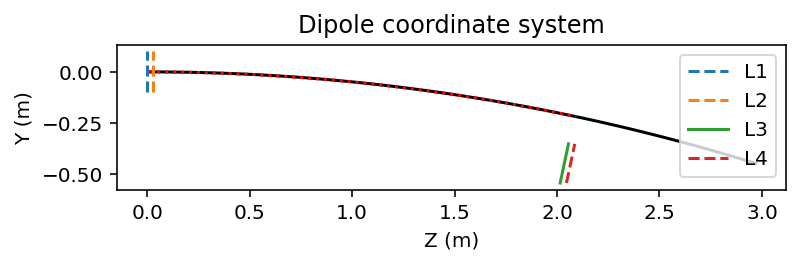

In [20]:
dipole.plot_dipole_fieldmap(DMAP, ref_data=I.output['dipole_stats'], g=1/10, L=3.0)

In [21]:
I.input['fieldmaps']['rfdata777']['data'][0] = 1

In [22]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpp3ilylsm
/Users/chrisonian/Code/impact/impactT/bin/ImpactTv2.1_serial
writing 1 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpp3ilylsm/partcl.data
Normal start with at time 0 s
Normal start: Replaced Np with 1 according to initial particles
Normal start: Replaced Tini with 0 according to initial particles
Normal start: Replaced Flagimg with 0 according to initial particles
Single particle, turning space charge off
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and jhigh:            1           1           1
 sumx1,sumy1:    0.0000000000000000        0.0000000000000

# CSR analysis

In [23]:
I2 = I.copy()
I2.configure()
I2.stop = 2.5
I2.run()

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpru6etrsk
Set stop to s = 2.5
Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpru6etrsk
/Users/chrisonian/Code/impact/impactT/bin/ImpactTv2.1_serial
writing 1 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpru6etrsk/partcl.data
Normal start with at time 0 s
Normal start: Replaced Np with 1 according to initial particles
Normal start: Replaced Tini with 0 according to initial particles
Normal start: Replaced Flagimg with 0 according to initial particles
Single particle, turning space charge off
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            3           3
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and

In [24]:
from scipy.constants import physical_constants

mec2 = physical_constants['electron mass energy equivalent in MeV'][0]*1e6

c_light = 299792458. # m/s

r_electron = physical_constants['classical electron radius'][0]

def W0_calc(rho=10, sigma_z=0.0003, total_charge=1e-12):
    
    N = total_charge/1.6e-19
    
    return N*r_electron*mec2 / rho**(2/3.) / sigma_z**(4/3.)
    
W0 = W0_calc()  

W0

96.54656146933664

In [25]:
I1 = Impact.from_archive('impact_6bcb411d0efbbf51d6df8096bdc4dd0d.h5') # 2.5 m

I2 = Impact.from_archive('impact_8abe9fea7069035129b86b72021a3957.h5') # 2.6 m

P1 = I1.particles['final_particles']
z1 = P1['mean_z']
P1.z -= z1

P2 = I2.particles['final_particles']
z2 = P2['mean_z']
P2.z -= z2

z1, z2, 

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'impact_6bcb411d0efbbf51d6df8096bdc4dd0d.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [122]:
from pmd_beamphysics.statistics import slice_statistics
?slice_statistics

Signature:
slice_statistics(
    particle_group,
    keys=['mean_z'],
    n_slice=40,
    slice_key='z',
)
Docstring:
Slices a particle group into n slices and returns statistics from each sliced defined in keys. 

These statistics should be scalar floats for now.

Any key can be used to slice on. 
File:      ~/Code/GitHub/openPMD-beamphysics/pmd_beamphysics/statistics.py
Type:      function


In [125]:
dat1 = slice_statistics(P1, keys=['mean_z', 'mean_energy'])
dat2 = slice_statistics(P2, keys=['mean_z', 'mean_energy'])

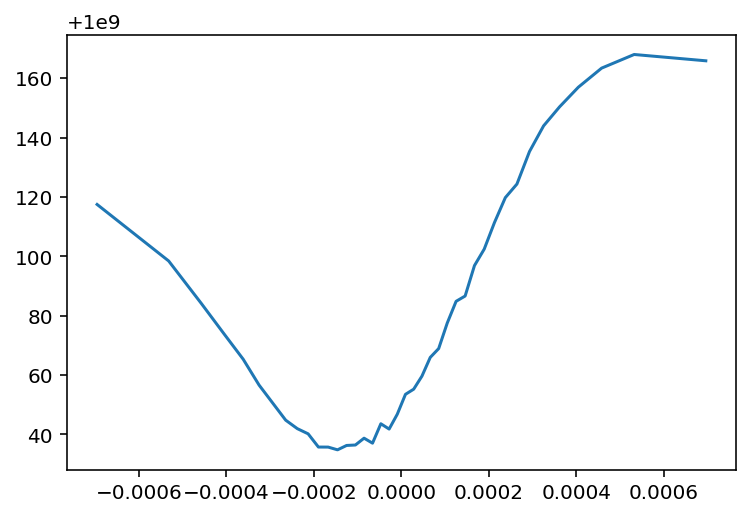

In [124]:
plt.plot(dat1['mean_z'], dat1['mean_energy'])

In [126]:
Z = np.linspace(-6e-4, 6e-4, 100)
E1 = np.interp(Z, dat1['mean_z'], dat1['mean_energy'])
E2 = np.interp(Z, dat2['mean_z'], dat2['mean_energy'])

In [137]:

dz = z2-z1
dz

0.0999999997097496

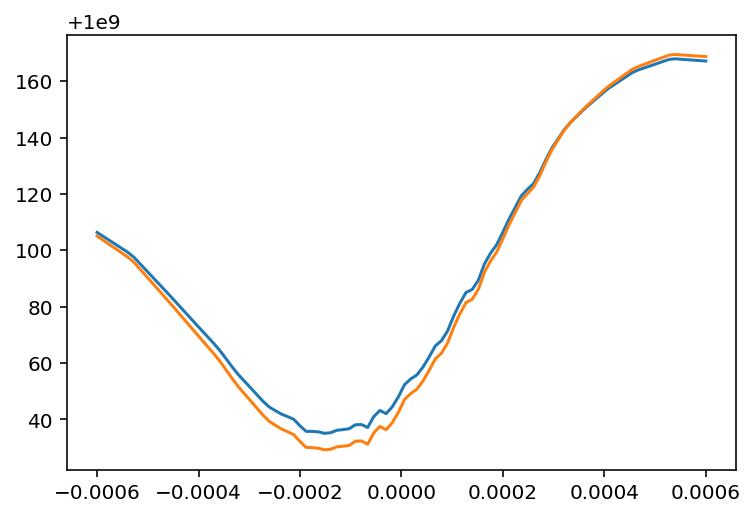

In [127]:
plt.plot(Z, E1)
plt.plot(Z, E2)

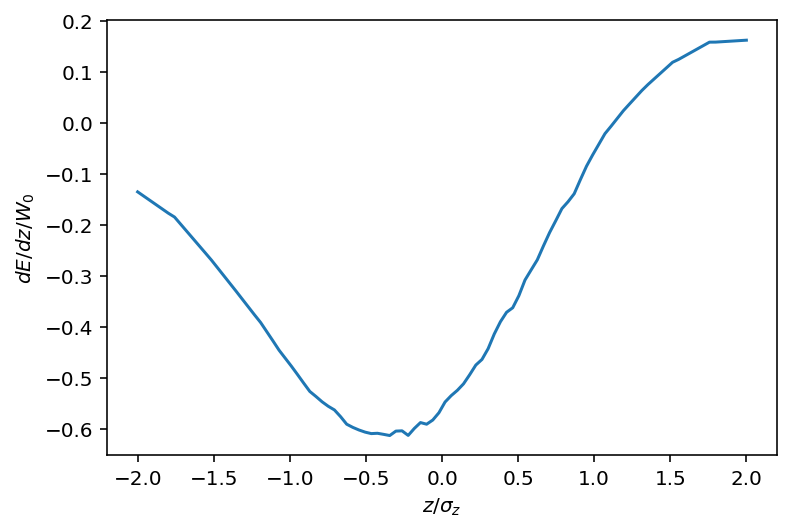

In [142]:
plt.xlabel('$z/\sigma_z$')
plt.ylabel('$dE/dz/W_0$')
plt.plot(Z/0.0003, (E2-E1)/dz/W0)

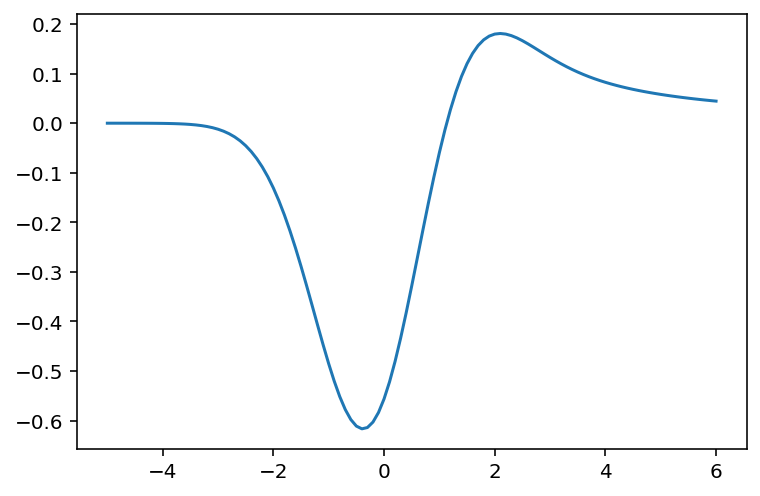

In [148]:
# Mathematica computed
SSdat = np.loadtxt('../../devel/steadystate_csr_wake.dat').T
SSz = SSdat[0]
SSw = SSdat[1]
plt.plot(SSz, SSw)

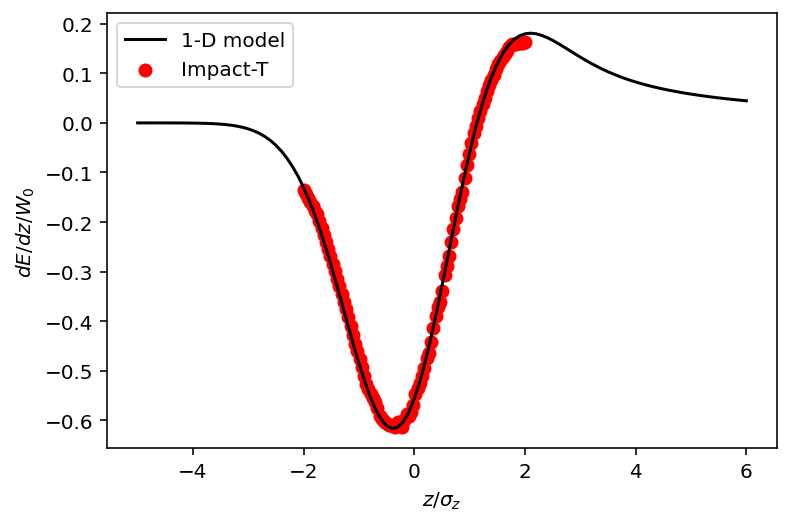

In [153]:
plt.xlabel('$z/\sigma_z$')
plt.ylabel('$dE/dz/W_0$')
plt.scatter(Z/0.0003, (E2-E1)/dz/W0, label='Impact-T', color='red')
plt.plot(SSz, SSw, label='1-D model', color='black')
plt.legend()

In [155]:
0.02**(2/3)*2.5

0.18420157493201939

In [161]:
(0.0006)**(-2/3)*(100.0)**(-1/3) * 0.0254/2

0.38462385881613614

In [167]:
W0_calc(rho=10, sigma_z=0.05, total_charge=1e-9) / 2.5e6

4.210481880313576e-05